In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
#Configuramos pandas para mostrarnos 20 filas
pd.set_option('display.max_rows', 20)
pd.set_option('display.min_rows', 20)

In [131]:
#Cargamos el fichero de cotizaciones seleccionando las columnas relevantes para el modelo
df=pd.read_csv('C:\\Users\\manuel.decesar\\Desktop\\data_labqt\\WIKI_PRICES_212b326a081eacca455e13140d7bb9db.csv', sep=',')[['ticker','date','adj_close','adj_volume']]  
print(len(df))
#fijamos los tipos de datos
df['date']=pd.to_datetime(df['date'])
print(len(df))
df

15389314
15389314


,ticker,date,adj_close,adj_volume
0,A,1999-11-18,30.018590,44739900.0
1,A,1999-11-19,27.548879,10897100.0
2,A,1999-11-22,30.018590,4705200.0
3,A,1999-11-23,27.460188,4274400.0
4,A,1999-11-24,28.012803,3464400.0
5,A,1999-11-26,28.101494,1237100.0
6,A,1999-11-29,28.742800,2914700.0
7,A,1999-11-30,28.783735,3083000.0
8,A,1999-12-01,29.295415,2115400.0
9,A,1999-12-02,30.107281,2195900.0


(8.21, 8.54]        263
(8.54, 8.767]       263
(8.767, 8.955]      263
(8.955, 9.11]       262
(9.11, 9.266]       263
(9.266, 9.419]      263
(9.419, 9.616]      262
(9.616, 9.874]      263
(9.874, 10.232]     263
(10.232, 11.921]    263
Name: adj_volume, dtype: int64
total de tickers 0
mediana de volumen ajustado por ticker 5399.499976849712


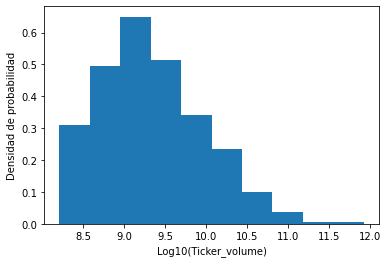

In [142]:
#Análisis volumen por ticker
%matplotlib inline
df_ticker_volume=np.log10(df.groupby(['ticker'])['adj_volume'].sum())
plt.hist(df_ticker_volume, density=True, bins=10)  # density=False would make counts
plt.ylabel('Densidad de probabilidad')
plt.xlabel('Log10(Ticker_volume)');
#percentiles
print(pd.qcut(df_ticker_volume,10).value_counts().sort_index())
print('total de tickers',10**df_ticker_cot.count())
print('mediana de volumen ajustado por ticker',10**df_ticker_cot.median())


(3.104, 3.304]    264
(3.304, 3.455]    262
(3.455, 3.561]    264
(3.561, 3.671]    261
(3.671, 3.732]    263
(3.732, 3.783]    263
(3.783, 3.819]    262
(3.819, 3.849]    263
(3.849, 3.917]    263
(3.917, 4.151]    263
Name: adj_close, dtype: int64
mediana de número de cotizaciones por ticker 5399.499976849712


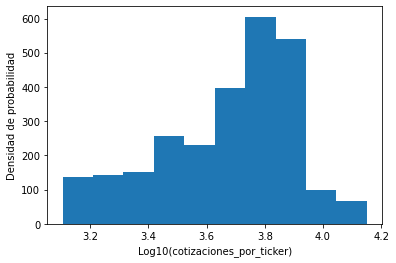

In [143]:
#Análisis cotizaciones por ticker
%matplotlib inline
df_ticker_cot=np.log10(df.groupby(['ticker'])['adj_close'].count())
plt.hist(df_ticker_cot, density=False, bins=10)  # density=False would make counts
plt.ylabel('Densidad de probabilidad')
plt.xlabel('Log10(cotizaciones_por_ticker)');
#percentiles
print(pd.qcut(df_ticker_cot,10).value_counts().sort_index())
print('mediana de número de cotizaciones por ticker',10**df_ticker_cot.median())

In [144]:
#Análisis nulos
print(df[df.ticker.isnull()])
print(df[df.date.isnull()])
print(df[df.adj_close.isnull()])
print(df[df.adj_volume.isnull()])

Empty DataFrame
Columns: [ticker, date, adj_close, adj_volume]
Index: []
Empty DataFrame
Columns: [ticker, date, adj_close, adj_volume]
Index: []
Empty DataFrame
Columns: [ticker, date, adj_close, adj_volume]
Index: []
Empty DataFrame
Columns: [ticker, date, adj_close, adj_volume]
Index: []


(0.999, 9.0]        2100
(9.0, 49.0]          843
(49.0, 86.0]        1534
(86.0, 185.0]       1256
(185.0, 534.0]      1406
(534.0, 1213.8]     1422
(1213.8, 1752.0]    1438
(1752.0, 2108.0]    1419
(2108.0, 2406.0]    1426
(2406.0, 2628.0]    1425
Name: adj_close, dtype: int64
número de fechas 14269
mediana de número de tickers por fecha 534.0


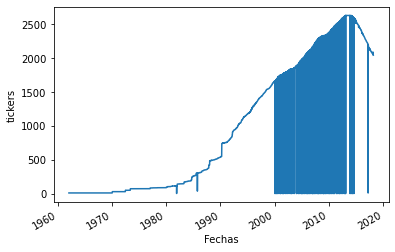

In [145]:
#Análisis discontinuidades de fechas
%matplotlib inline
df_date_tikers=df.groupby(['date'])['adj_close'].count()
df_date_tikers.plot()
plt.ylabel('tickers')
plt.xlabel('Fechas');
#percentiles
print(pd.qcut(df_date_tikers,10).value_counts().sort_index())
print('número de fechas',len(df_date_tikers))
print('mediana de número de tickers por fecha',df_date_tikers.median())

In [146]:
df_date_tikers[df_date_tikers<5][25:50]

date
2003-02-17    1
2003-05-26    1
2003-09-01    1
2004-01-19    1
2004-02-16    1
2004-05-31    1
2004-07-05    1
2004-09-06    1
2004-11-25    1
2004-12-24    1
             ..
2005-09-05    1
2005-11-24    1
2005-12-26    1
2006-01-02    1
2006-01-16    1
2006-02-20    1
2006-04-14    1
2006-05-29    1
2006-07-04    1
2006-09-04    1
Name: adj_close, Length: 25, dtype: int64

<AxesSubplot:xlabel='date'>

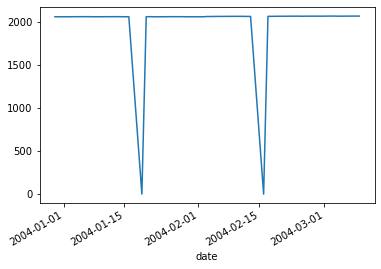

In [127]:
df_date_tikers[10600:10650].plot()

In [120]:
df[df.date=='2004-01-19']

,ticker,date,adj_close,adj_volume
13242329,TAM,2004-01-19,0.385,132300.0


In [123]:
df[(df.ticker=='TAM') & (df.date>='2004-01-19')]

,ticker,date,adj_close,adj_volume
13242329,TAM,2004-01-19,0.385,132300.0
13242330,TAM,2004-01-20,0.390,143300.0
13242331,TAM,2004-01-21,0.385,264600.0
13242332,TAM,2004-01-26,0.390,132300.0
13242333,TAM,2004-01-27,0.385,198400.0
13242334,TAM,2004-01-28,0.390,11000.0
13242335,TAM,2004-02-09,0.370,55100.0
13242336,TAM,2004-02-10,0.380,99200.0
13242337,TAM,2004-02-11,0.380,66100.0
13242338,TAM,2004-02-16,0.375,0.0


In [125]:
df[(df.ticker=='A') & (df.date>='2004-01-19')]

,ticker,date,adj_close,adj_volume
1045,A,2004-01-20,23.203006,3709300.0
1046,A,2004-01-21,23.721509,4371400.0
1047,A,2004-01-22,23.182539,3581400.0
1048,A,2004-01-23,22.814129,2155400.0
1049,A,2004-01-26,23.134782,3519500.0
1050,A,2004-01-27,24.628889,21899200.0
1051,A,2004-01-28,24.526553,5511000.0
1052,A,2004-01-29,24.321880,3919600.0
1053,A,2004-01-30,25.147392,5561100.0
1054,A,2004-02-02,24.847206,3058100.0


In [128]:
#Filtrar tickers sin suficiente volumen
df=df[df['ticker'].isin(df_ticker_volume[df_ticker_volume>8.211].index)]
#Filtrar tickers sin suficientes cotizaciones
df=df[df['ticker'].isin(df_ticker_cot[df_ticker_cot>3.104].index)]
#Filtrar registros sin volumen
df=df[df['adj_close']>0]
#Filtrar muestra para desarrollo
df=df.sort_values(by=['date'], ascending=False)[4000000:5000000]
df=df.sort_values(by=['ticker','date'])
df=df.reset_index()
#Establecemos índice (ticker y fecha)
df=df.set_index(['ticker','date'])
#df

In [5]:
#tickers posibles
print(np.unique(df.index.get_level_values(0)))
#fechas posibles
print(np.unique(df.index.get_level_values(1)))

['A' 'AAL' 'AAN' ... 'ZNGA' 'ZQK' 'ZUMZ']
['2011-03-30T00:00:00.000000000' '2011-03-31T00:00:00.000000000'
 '2011-04-01T00:00:00.000000000' '2011-04-04T00:00:00.000000000'
 '2011-04-05T00:00:00.000000000' '2011-04-06T00:00:00.000000000'
 '2011-04-07T00:00:00.000000000' '2011-04-08T00:00:00.000000000'
 '2011-04-11T00:00:00.000000000' '2011-04-12T00:00:00.000000000'
 '2011-04-13T00:00:00.000000000' '2011-04-14T00:00:00.000000000'
 '2011-04-15T00:00:00.000000000' '2011-04-18T00:00:00.000000000'
 '2011-04-19T00:00:00.000000000' '2011-04-20T00:00:00.000000000'
 '2011-04-21T00:00:00.000000000' '2011-04-25T00:00:00.000000000'
 '2011-04-26T00:00:00.000000000' '2011-04-27T00:00:00.000000000'
 '2011-04-28T00:00:00.000000000' '2011-04-29T00:00:00.000000000'
 '2011-05-02T00:00:00.000000000' '2011-05-03T00:00:00.000000000'
 '2011-05-04T00:00:00.000000000' '2011-05-05T00:00:00.000000000'
 '2011-05-06T00:00:00.000000000' '2011-05-09T00:00:00.000000000'
 '2011-05-10T00:00:00.000000000' '2011-05-11T00:

In [6]:
#Calculamos el retorno respecto al día anterior: incremento relativo del ticker respecto el día anterior
df['return_d']=df.groupby(level='ticker')['adj_close'].pct_change()
#Calculamos el retorno respecto a la semana anterior: incremento relativo del ticker respecto a la semana anterior
df['return_w']=df.groupby(level='ticker')['adj_close'].pct_change(periods=5)
#Calculamos el retorno respecto al mes anterior: incremento relativo del ticker respecto el mes anterior
df['return_m']=df.groupby(level='ticker')['adj_close'].pct_change(periods=20)
#Calculamos el retorno respecto al año anterior: incremento relativo del ticker respecto el año anterior
df['return_y']=df.groupby(level='ticker')['adj_close'].pct_change(periods=252)
#df

In [7]:
#Cierre ajustado promediado semanal
df['adj_close_m_pw']=df.groupby(level='ticker')['adj_close'].apply(lambda grp: grp.shift(periods=1).rolling(5).mean())
#Cierre ajustado promediado ponderado por volumen
df['adj_close_vwm_pw']=df.reset_index('ticker').groupby('ticker').apply(lambda grp: (grp['adj_close']*grp['adj_volume']).shift(periods=1).rolling(5).sum()/grp.shift(periods=1)['adj_volume'].rolling(5).sum())
#df.loc['AMZN']

In [8]:
#Retorno respecto al cierre ajustado promediado ponderado
df['return_m_pw']=df.apply(lambda x: (x['adj_close']-x['adj_close_m_pw'])/x['adj_close_m_pw'], axis=1)
df#Retorno respecto al cierre ajustado promediado ponderado
df['return_vwm_pw']=df.apply(lambda x: (x['adj_close']-x['adj_close_vwm_pw'])/x['adj_close_vwm_pw'], axis=1)
#df

In [9]:
#Volatilidad semanal del retorno diario
df['volatility_w_rd']=df.reset_index('ticker').groupby('ticker').apply(lambda grp: grp['return_d'].shift(periods=1).rolling(5).std())
#df

In [10]:
#me faltarían los tipos de tickers y los días de la semana

In [11]:
#Calculamos el retorno al día siguiente: incremento relativo del ticker en el día siguiente (target)
df['return_f_d']=df.groupby(level='ticker')['adj_close'].pct_change().shift(periods=-1)
df

adj_close  adj_volume  return_d  return_w  return_m  \
ticker date                                                              
A      2011-03-31  30.550738   2194900.0       NaN       NaN       NaN   
       2011-04-01  30.796345   2212300.0  0.008039       NaN       NaN   
       2011-04-04  30.584850   2133900.0 -0.006868       NaN       NaN   
       2011-04-05  30.932793   3136800.0  0.011376       NaN       NaN   
       2011-04-06  30.898681   2351900.0 -0.001103       NaN       NaN   
       2011-04-07  30.612140   2102400.0 -0.009274  0.002010       NaN   
       2011-04-08  30.625784   2001500.0  0.000446 -0.005538       NaN   
       2011-04-11  30.694008   1578800.0  0.002228  0.003569       NaN   
       2011-04-12  30.659896   2771600.0 -0.001111 -0.008822       NaN   
       2011-04-13  31.785594   5098300.0  0.036716  0.028704       NaN   
...                      ...         ...       ...       ...       ...   
ZUMZ   2012-08-17  35.800000    353500.0  0.018782  0.051086  0.007883   
       2012-08-20  34.520000    324800.0 -0.035754  0.019492 -0.034406   
       2012-08-21  34.860000    330100.0  0.009849  0.023188 -0.016643   
       2012-08-22  34.230000    446900.0 -0.018072 -0.002622 -0.034959   
       2012-08-23  33.440000    285800.0 -0.023079 -0.048378 -0.089077   
       2012-08-24  31.510000   1097200.0 -0.057715 -0.119832 -0.168163   
       2012-08-27  31.340000    635000.0 -0.005395 -0.092121 -0.162256   
       2012-08-28  31.830000    716700.0  0.015635 -0.086919 -0.123865   
       2012-08-29  31.570000   1133600.0 -0.008168 -0.077710 -0.121347   
       2012-08-30  32.220000   1632900.0  0.020589 -0.036483 -0.003094   

                   return_y  adj_close_m_pw  adj_close_vwm_pw  return_m_pw  \
ticker date                                                                  
A      2011-03-31       NaN             NaN               NaN          NaN   
       2011-04-01       NaN             NaN               NaN          NaN   
       2011-04-04       NaN             NaN               NaN          NaN   
       2011-04-05       NaN             NaN               NaN          NaN   
       2011-04-06       NaN             NaN               NaN          NaN   
       2011-04-07       NaN       30.752681         30.769603    -0.004570   
       2011-04-08       NaN       30.764961         30.782113    -0.004524   
       2011-04-11       NaN       30.730849         30.752746    -0.001199   
       2011-04-12       NaN       30.752681         30.776515    -0.003017   
       2011-04-13       NaN       30.698102         30.701241     0.035425   
...                     ...             ...               ...          ...   
ZUMZ   2012-08-17  1.105882       34.290000         34.236735     0.044036   
       2012-08-20  1.002320       34.638000         34.669428    -0.003407   
       2012-08-21  1.078712       34.770000         34.762632     0.002588   
       2012-08-22  0.810153       34.928000         34.961161    -0.019984   
       2012-08-23  0.781566       34.910000         34.858316    -0.042108   
       2012-08-24  0.717166       34.570000         34.592626    -0.088516   
       2012-08-27  0.681330       33.712000         33.059680    -0.070361   
       2012-08-28  0.632308       33.076000         32.499283    -0.037671   
       2012-08-29  0.637448       32.470000         32.103587    -0.027718   
       2012-08-30  0.742564       31.938000         31.701558     0.008830   

                   return_vwm_pw  volatility_w_rd  return_f_d  
ticker date                                                    
A      2011-03-31            NaN              NaN    0.008039  
       2011-04-01            NaN              NaN   -0.006868  
       2011-04-04            NaN              NaN    0.011376  
       2011-04-05            NaN              NaN   -0.001103  
       2011-04-06            NaN              NaN   -0.009274  
       2011-04-07      -0.005117              NaN    0.000446  
       20

In [12]:
#Seleccionar features finales y target
df.reset_index()[['return_d','return_w','return_m','return_y','return_m_pw','return_vwm_pw','volatility_w_rd','return_f_d']]

,return_d,return_w,return_m,return_y,return_m_pw,return_vwm_pw,volatility_w_rd,return_f_d
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008039
1,0.008039,NaN,NaN,NaN,NaN,NaN,NaN,-0.006868
2,-0.006868,NaN,NaN,NaN,NaN,NaN,NaN,0.011376
3,0.011376,NaN,NaN,NaN,NaN,NaN,NaN,-0.001103
4,-0.001103,NaN,NaN,NaN,NaN,NaN,NaN,-0.009274
5,-0.009274,0.002010,NaN,NaN,-0.004570,-0.005117,NaN,0.000446
6,0.000446,-0.005538,NaN,NaN,-0.004524,-0.005079,0.009048,0.002228
7,0.002228,0.003569,NaN,NaN,-0.001199,-0.001910,0.008033,-0.001111
8,-0.001111,-0.008822,NaN,NaN,-0.003017,-0.003789,0.007401,0.036716
9,0.036716,0.028704,NaN,NaN,0.035425,0.035320,0.004418,0.000859


In [18]:
#Zscore (normalizar? por día? para todos los tickets?)
df['zscore']=df.groupby('date')['adj_close'].transform(lambda grp: (grp - grp.mean())/ grp.std())
df

adj_close  adj_volume  return_d  return_w  return_y  \
ticker date                                                              
A      2011-03-31  30.550738   2194900.0       NaN       NaN       NaN   
       2011-04-01  30.796345   2212300.0  0.008039       NaN       NaN   
       2011-04-04  30.584850   2133900.0 -0.006868       NaN       NaN   
       2011-04-05  30.932793   3136800.0  0.011376       NaN       NaN   
       2011-04-06  30.898681   2351900.0 -0.001103       NaN       NaN   
       2011-04-07  30.612140   2102400.0 -0.009274  0.002010       NaN   
       2011-04-08  30.625784   2001500.0  0.000446 -0.005538       NaN   
       2011-04-11  30.694008   1578800.0  0.002228  0.003569       NaN   
       2011-04-12  30.659896   2771600.0 -0.001111 -0.008822       NaN   
       2011-04-13  31.785594   5098300.0  0.036716  0.028704       NaN   
...                      ...         ...       ...       ...       ...   
ZUMZ   2012-08-17  35.800000    353500.0  0.018782  0.051086  1.105882   
       2012-08-20  34.520000    324800.0 -0.035754  0.019492  1.002320   
       2012-08-21  34.860000    330100.0  0.009849  0.023188  1.078712   
       2012-08-22  34.230000    446900.0 -0.018072 -0.002622  0.810153   
       2012-08-23  33.440000    285800.0 -0.023079 -0.048378  0.781566   
       2012-08-24  31.510000   1097200.0 -0.057715 -0.119832  0.717166   
       2012-08-27  31.340000    635000.0 -0.005395 -0.092121  0.681330   
       2012-08-28  31.830000    716700.0  0.015635 -0.086919  0.632308   
       2012-08-29  31.570000   1133600.0 -0.008168 -0.077710  0.637448   
       2012-08-30  32.220000   1632900.0  0.020589 -0.036483  0.742564   

                   adj_close_w  adj_close_ww  return_ww  volatility_w  \
ticker date                                                             
A      2011-03-31          NaN           NaN        NaN           NaN   
       2011-04-01          NaN           NaN        NaN           NaN   
       2011-04-04          NaN           NaN        NaN           NaN   
       2011-04-05          NaN           NaN        NaN           NaN   
       2011-04-06    30.752681     30.769603   0.004195      0.176501   
       2011-04-07    30.764961     30.782113  -0.005522      0.160334   
       2011-04-08    30.730849     30.752746  -0.004128      0.169849   
       2011-04-11    30.752681     30.776515  -0.002681      0.152523   
       2011-04-12    30.698102     30.701241  -0.001347      0.116541   
       2011-04-13    30.875484     31.074896   0.022870      0.509758   
...                        ...           ...        ...           ...   
ZUMZ   2012-08-17    34.638000     34.669428   0.032610      0.811061   
       2012-08-20    34.770000     34.762632  -0.006980      0.698713   
       2012-08-21    34.928000     34.961161  -0.002894      0.580103   
       2012-08-22    34.910000     34.858316  -0.018025      0.604566   
       2012-08-23    34.570000     34.592626  -0.033320      0.864870   
       2012-08-24    33.712000     33.059680  -0.046875      1.338084   
       2012-08-27    33.076000     32.499283  -0.035671      1.590041   
       2012-08-28    32.470000     32.103587  -0.008522      1.289050   
       2012-08-29    31.938000     31.701558  -0.004150      0.857887   
       2012-08-30    31.694000     31.768613   0.014209      0.342681   

                     zscore  
ticker date                  
A      2011-03-31 -0.022581  
       2011-04-01 -0.022518  
       2011-04-04 -0.022701  
       2011-04-05 -0.022598  
       2011-04-06 -0.022505  
       2011-04-07 -0.022610  
       2011-04-08 -0.022611  
       2011-04-11 -0.022335  
       2011-04-12 -0.022080  
       2011-04-13 -0.021707  
...                     ...  
ZUMZ   2012-08-17 -0.018161  
       2012-08-20 -0.018644  
       2012-08-21 -0.018475  
       2012-08-22 -0.018676  
       2012-08-23 -0.018837  
       2012-08-24 -0.019670  
       2012-08-27 -0.019719  
       2012-08-28 -0.019592  
      

adj_close  adj_volume  return_d  return_w  return_y  \
ticker date                                                              
A      2011-03-31  30.550738   2194900.0       NaN       NaN       NaN   
       2011-04-01  30.796345   2212300.0  0.008039       NaN       NaN   
       2011-04-04  30.584850   2133900.0 -0.006868       NaN       NaN   
       2011-04-05  30.932793   3136800.0  0.011376       NaN       NaN   
       2011-04-06  30.898681   2351900.0 -0.001103       NaN       NaN   
       2011-04-07  30.612140   2102400.0 -0.009274  0.002010       NaN   
       2011-04-08  30.625784   2001500.0  0.000446 -0.005538       NaN   
       2011-04-11  30.694008   1578800.0  0.002228  0.003569       NaN   
       2011-04-12  30.659896   2771600.0 -0.001111 -0.008822       NaN   
       2011-04-13  31.785594   5098300.0  0.036716  0.028704       NaN   
...                      ...         ...       ...       ...       ...   
ZUMZ   2012-08-17  35.800000    353500.0  0.018782  0.051086  1.105882   
       2012-08-20  34.520000    324800.0 -0.035754  0.019492  1.002320   
       2012-08-21  34.860000    330100.0  0.009849  0.023188  1.078712   
       2012-08-22  34.230000    446900.0 -0.018072 -0.002622  0.810153   
       2012-08-23  33.440000    285800.0 -0.023079 -0.048378  0.781566   
       2012-08-24  31.510000   1097200.0 -0.057715 -0.119832  0.717166   
       2012-08-27  31.340000    635000.0 -0.005395 -0.092121  0.681330   
       2012-08-28  31.830000    716700.0  0.015635 -0.086919  0.632308   
       2012-08-29  31.570000   1133600.0 -0.008168 -0.077710  0.637448   
       2012-08-30  32.220000   1632900.0  0.020589 -0.036483  0.742564   

                   adj_close_w  adj_close_ww  return_ww  volatility_w  \
ticker date                                                             
A      2011-03-31          NaN           NaN        NaN           NaN   
       2011-04-01          NaN           NaN        NaN           NaN   
       2011-04-04          NaN           NaN        NaN           NaN   
       2011-04-05          NaN           NaN        NaN           NaN   
       2011-04-06    30.752681     30.769603   0.004195      0.176501   
       2011-04-07    30.764961     30.782113  -0.005522      0.160334   
       2011-04-08    30.730849     30.752746  -0.004128      0.169849   
       2011-04-11    30.752681     30.776515  -0.002681      0.152523   
       2011-04-12    30.698102     30.701241  -0.001347      0.116541   
       2011-04-13    30.875484     31.074896   0.022870      0.509758   
...                        ...           ...        ...           ...   
ZUMZ   2012-08-17    34.638000     34.669428   0.032610      0.811061   
       2012-08-20    34.770000     34.762632  -0.006980      0.698713   
       2012-08-21    34.928000     34.961161  -0.002894      0.580103   
       2012-08-22    34.910000     34.858316  -0.018025      0.604566   
       2012-08-23    34.570000     34.592626  -0.033320      0.864870   
       2012-08-24    33.712000     33.059680  -0.046875      1.338084   
       2012-08-27    33.076000     32.499283  -0.035671      1.590041   
       2012-08-28    32.470000     32.103587  -0.008522      1.289050   
       2012-08-29    31.938000     31.701558  -0.004150      0.857887   
       2012-08-30    31.694000     31.768613   0.014209      0.342681   

                     zscore  return_f_d  
ticker date                              
A      2011-03-31 -0.022581    0.008039  
       2011-04-01 -0.022518   -0.006868  
       2011-04-04 -0.022701    0.011376  
       2011-04-05 -0.022598   -0.001103  
       2011-04-06 -0.022505   -0.009274  
       2011-04-07 -0.022610    0.000446  
       2011-04-08 -0.022611    0.002228  
       2011-04-11 -0.022335   -0.001111  
       2011-04-12 -0.022080    0.036716  
       2011-04-13 -0.021707    0.000859  
...                     ...         ...  
ZUMZ   2012-08-17 -0.018161   -0.035754  
       2012-08-20 -0.018644    0.009849  
      

Retornos diarios


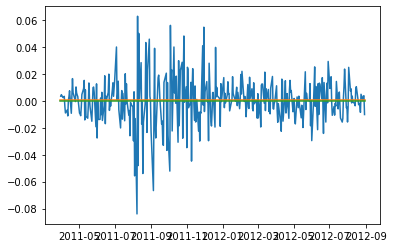

Retornos diarios acumulados sin reinvertir


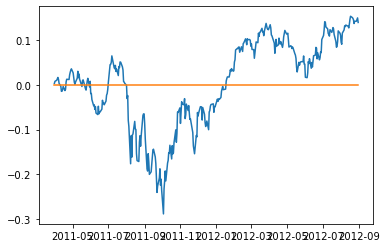

Retornos diarios acumulados reinvirtiendo


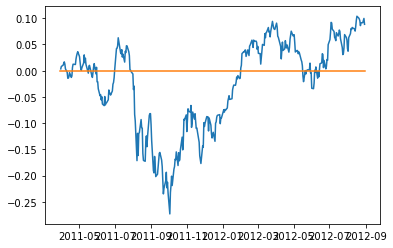

In [20]:
#Retornos diarios estrategia básica (estrategia de repartir a partes iguales entre todos los tickers diariamente)
s=df.groupby(level='date')['return_d'].mean()
print('Retornos diarios')
plt.plot(s)
plt.plot(s.index,[s.mean()]*len(s.index))
plt.plot(s.index,[0]*len(s.index))
plt.show() 
#Retornos diarios acumulados hasta la fecha sin reinvertir los retornos diarios
print('Retornos diarios acumulados sin reinvertir')
cs=s.cumsum()
plt.plot(cs)
plt.plot(cs.index,[0]*len(cs.index))
plt.show() 
#Retornos diarios acumulados hasta la fecha reinvirtiendo los retornos diarios
print('Retornos diarios acumulados reinvirtiendo')
rcs=(s+1).cumprod()
plt.plot(rcs-1)
plt.plot(rcs.index,[0]*len(rcs.index))
plt.show()

Siguiente:

ver código de Manu 0013_init_example (sharepoint lab)

feature zscore

segmentation model (proportional segmentation)

tree model (like in 0013_init_example)

more comlex model 